In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import sys

sys.path.insert(0,'/home/garren/HPC Files/Pure RK PMF - No Temps')

from Post_procs import Post_process

In [21]:
functional_groups = np.array(['all'])
include_clusters = True
include_zeros = True
refT = True
ARD = False
inf_type = 'MAP'

In [22]:
model_variants = []
model_markers = []
colors = ['r', 'b', 'k', 'g']
MAE = []
RMSE = []
MARE = []
log_obj = []
for t in [True, False]:
    counter = 0
    for c in [True, False]:
        for z in [True, False]:
                model_variants += [f'C,Z,T: {c},{z},{t}']
                if t == True:
                    model_markers += [f'.{colors[counter]}']
                else:
                    model_markers += [f'*{colors[counter]}']
                counter += 1

                post_obj = Post_process(include_clusters=c,
                                        include_zeros=z,
                                        refT=t,
                                        ARD=ARD,
                                        inf_type=inf_type,
                                        functional_groups=functional_groups)
                
                A = post_obj.get_tensors()
                err_dict = post_obj.get_testing_metrics(A=A)
                ranks = post_obj.ranks

                MAE += [[err_dict['MC', 'MAE', r][-1] for r in ranks]]
                RMSE += [[err_dict['MC', 'RMSE', r][-1] for r in ranks]]
                MARE += [[err_dict['MC', 'MARE', r][-1]*100 for r in ranks]]
                log_obj += [post_obj.log_obj]

In [23]:
matplotlib.use('qt5agg')
%matplotlib inline

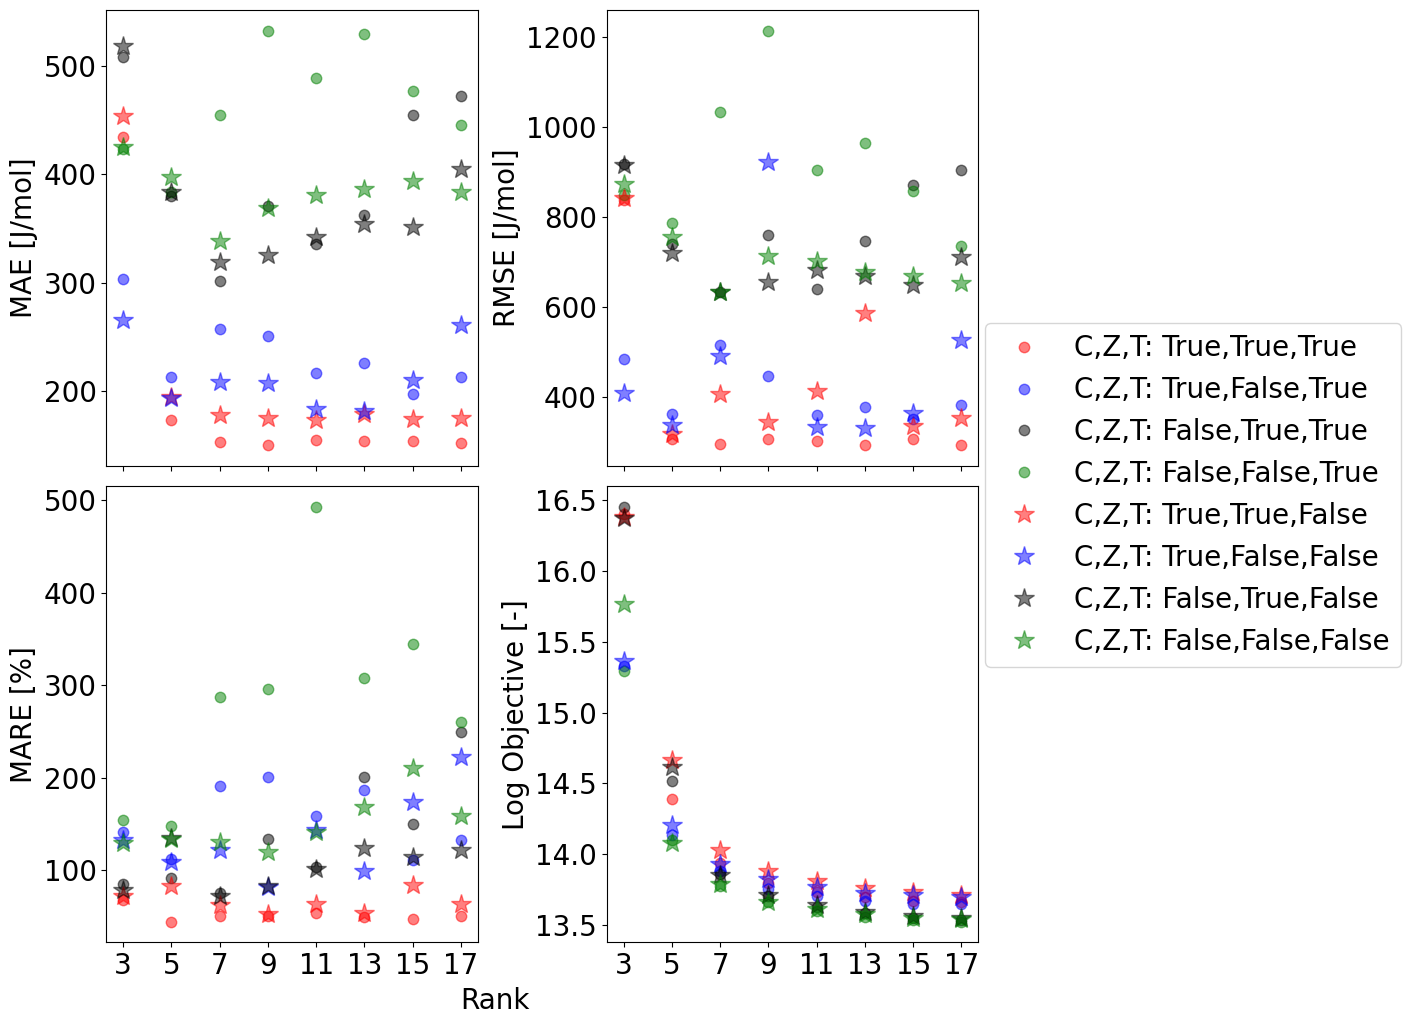

In [24]:
fig,ax = plt.subplots(2,2, figsize=(10,10), sharex=True)
markersize=15
alpha=0.5
p = []
for i in range(len(model_markers)):
    p += [ax[0,0].plot(ranks, MAE[i], model_markers[i], label=model_variants[i], markersize=markersize, alpha=alpha)]
    ax[0,1].plot(ranks, RMSE[i], model_markers[i], label=model_variants[i], markersize=markersize, alpha=alpha)
    ax[1,0].plot(ranks, MARE[i], model_markers[i], label=model_variants[i], markersize=markersize, alpha=alpha)
    ax[1,1].plot(ranks, log_obj[i], model_markers[i], label=model_variants[i], markersize=markersize, alpha=alpha)
ax[0,0].set_ylabel('MAE [J/mol]', fontsize=20)
ax[0,1].set_ylabel('RMSE [J/mol]', fontsize=20)
ax[1,0].set_ylabel('MARE [%]', fontsize=20)
ax[1,1].set_ylabel('Log Objective [-]', fontsize=20)
ax[0,0].set_xticks(ranks)
ax[0,0].tick_params(axis='both', which='major', labelsize=20)
ax[0,1].tick_params(axis='both', which='major', labelsize=20)
ax[1,0].tick_params(axis='both', which='major', labelsize=20)
ax[1,1].tick_params(axis='both', which='major', labelsize=20)
fig.legend([pp[0] for pp in p], model_variants, loc='center right', bbox_to_anchor=(1.42, 0.5), fontsize=20)
fig.text(0.5, -0.02, 'Rank', ha='center', va='bottom', fontsize=20)
#ax[0,0].set_ylim([0, 600])
#ax[0,1].set_ylim([0, 1500])
#ax[1,0].set_ylim([0, 400])
plt.tight_layout()

png_path = '/'.join(post_obj.path.split('/')[:7])
png_path += '/Overall_error_metrics.png'
plt.savefig(png_path, dpi=500, bbox_inches='tight')